Сервис по продаже автомобилей с пробегом «Не бит, не крашен» разрабатывает приложение для привлечения новых клиентов. В нём можно быстро узнать рыночную стоимость своего автомобиля. В вашем распоряжении исторические данные: технические характеристики, комплектации и цены автомобилей. Вам нужно построить модель для определения стоимости. 

Заказчику важны:

- качество предсказания;
- скорость предсказания;
- время обучения.

# 1. Подготовка данных

In [1]:
import pandas as pd
df = pd.read_csv('autos_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
DateCrawled          354369 non-null object
Price                354369 non-null int64
VehicleType          316879 non-null object
RegistrationYear     354369 non-null int64
Gearbox              334536 non-null object
Power                354369 non-null int64
Model                334664 non-null object
Kilometer            354369 non-null int64
RegistrationMonth    354369 non-null int64
FuelType             321474 non-null object
Brand                354369 non-null object
NotRepaired          283215 non-null object
DateCreated          354369 non-null object
NumberOfPictures     354369 non-null int64
PostalCode           354369 non-null int64
LastSeen             354369 non-null object
dtypes: int64(7), object(9)
memory usage: 43.3+ MB


В таблице 16 столбцов и 354369 строк. Есть пропуски в столбцах VehicleType(тип автомобильного кузова), Gearbox(тип коробки передач), Model(модель автомобиля), FuelType(тип топлива), NotRepaired(была машина в ремонте или нет).

In [2]:
df.head()

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [3]:
print('Пропусков в столбце тип кузова:',df['VehicleType'].isnull().sum())

Пропусков в столбце тип кузова: 37490


In [4]:
df['VehicleType'].value_counts()

sedan          91457
small          79831
wagon          65166
bus            28775
convertible    20203
coupe          16163
suv            11996
other           3288
Name: VehicleType, dtype: int64

В столбце Тип автомобильного кузова заменим пропуски на other(другое):

In [5]:
df['VehicleType']=df['VehicleType'].fillna('other')
df['VehicleType'].isnull().sum()

0

In [6]:
df['Gearbox'].isnull().sum()

19833

Заменим пропуске в столбце типа коробки передач на "Не указано"(unspecified):

In [7]:
df['Gearbox']=df['Gearbox'].fillna('unspecified')
df['Gearbox'].isnull().sum()

0

Аналогично для столбца Model:

In [8]:
df['Model']=df['Model'].fillna('other')
df['Model'].isnull().sum()

0

В столбце FuelType встречаются синонимы - gasoline и petrol. Объединим их:

In [9]:
df['FuelType']=df['FuelType'].replace('gasoline','petrol')
df['FuelType'].value_counts()

petrol      315072
lpg           5310
cng            565
hybrid         233
other          204
electric        90
Name: FuelType, dtype: int64

Пропуски заменим на other:

In [10]:
df['FuelType']=df['FuelType'].fillna('other')

В столбце NotRepaired заменим yes - 1, no - 0, Nan - 0 :

In [11]:
df['NotRepaired']=df['NotRepaired'].fillna(0)
df['NotRepaired']=df['NotRepaired'].replace('yes',1)
df['NotRepaired']=df['NotRepaired'].replace('no',0)
df['NotRepaired'].isnull().sum()

0

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
DateCrawled          354369 non-null object
Price                354369 non-null int64
VehicleType          354369 non-null object
RegistrationYear     354369 non-null int64
Gearbox              354369 non-null object
Power                354369 non-null int64
Model                354369 non-null object
Kilometer            354369 non-null int64
RegistrationMonth    354369 non-null int64
FuelType             354369 non-null object
Brand                354369 non-null object
NotRepaired          354369 non-null int64
DateCreated          354369 non-null object
NumberOfPictures     354369 non-null int64
PostalCode           354369 non-null int64
LastSeen             354369 non-null object
dtypes: int64(8), object(8)
memory usage: 43.3+ MB


In [13]:
df.head()

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,other,1993,manual,0,golf,150000,0,petrol,volkswagen,0,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,other,125000,5,petrol,audi,1,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,petrol,jeep,0,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,0,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,petrol,skoda,0,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [14]:
df.describe()

,Price,RegistrationYear,Power,Kilometer,RegistrationMonth,NotRepaired,NumberOfPictures,PostalCode
count,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000,354369.0,354369.000000
mean,4416.656776,2004.234448,110.094337,128211.172535,5.714645,0.101741,0.0,50508.689087
std,4514.158514,90.227958,189.850405,37905.341530,3.726421,0.302308,0.0,25783.096248
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.000000,0.0,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.000000,0.0,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.000000,0.0,49413.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.000000,0.0,71083.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,1.000000,0.0,99998.000000


В столбце RegistrationYear есть значения от 1000 до 9999, то есть неверные значения - из будущего и прошлого(Первый автомобиль был изобретен в 1768 году) - удалим:

In [15]:
df = df.query('RegistrationYear <= 2016') 
df = df.query('RegistrationYear >= 1768')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 339778 entries, 0 to 354368
Data columns (total 16 columns):
DateCrawled          339778 non-null object
Price                339778 non-null int64
VehicleType          339778 non-null object
RegistrationYear     339778 non-null int64
Gearbox              339778 non-null object
Power                339778 non-null int64
Model                339778 non-null object
Kilometer            339778 non-null int64
RegistrationMonth    339778 non-null int64
FuelType             339778 non-null object
Brand                339778 non-null object
NotRepaired          339778 non-null int64
DateCreated          339778 non-null object
NumberOfPictures     339778 non-null int64
PostalCode           339778 non-null int64
LastSeen             339778 non-null object
dtypes: int64(8), object(8)
memory usage: 44.1+ MB


Удалим не нужные для нашей задачи признаки:

In [17]:
df = (df.drop(['DateCrawled','RegistrationMonth', 'DateCreated',
               'PostalCode', 'LastSeen','NumberOfPictures'], axis=1))

In [18]:
df.head()

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,FuelType,Brand,NotRepaired
0,480,other,1993,manual,0,golf,150000,petrol,volkswagen,0
1,18300,coupe,2011,manual,190,other,125000,petrol,audi,1
2,9800,suv,2004,auto,163,grand,125000,petrol,jeep,0
3,1500,small,2001,manual,75,golf,150000,petrol,volkswagen,0
4,3600,small,2008,manual,69,fabia,90000,petrol,skoda,0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 339778 entries, 0 to 354368
Data columns (total 10 columns):
Price               339778 non-null int64
VehicleType         339778 non-null object
RegistrationYear    339778 non-null int64
Gearbox             339778 non-null object
Power               339778 non-null int64
Model               339778 non-null object
Kilometer           339778 non-null int64
FuelType            339778 non-null object
Brand               339778 non-null object
NotRepaired         339778 non-null int64
dtypes: int64(5), object(5)
memory usage: 28.5+ MB


In [20]:
print('Очищенный датасет: ',len(df))
print('Пропуски:\n', df.isna().sum())

Очищенный датасет:  339778
Пропуски:
 Price               0
VehicleType         0
RegistrationYear    0
Gearbox             0
Power               0
Model               0
Kilometer           0
FuelType            0
Brand               0
NotRepaired         0
dtype: int64


Перекодируем категориальные переменные:

In [21]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
df[["VehicleType","Gearbox", "Model", "FuelType", "Brand", "NotRepaired"]] = (encoder.fit_transform(df[["VehicleType","Gearbox", "Model", "FuelType", "Brand", "NotRepaired"]]))

Рассмотрим столбец Power:

In [22]:
df['Power'].describe()

count    339778.000000
mean        111.012573
std         186.923188
min           0.000000
25%          69.000000
50%         105.000000
75%         143.000000
max       20000.000000
Name: Power, dtype: float64

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,8))
sns.boxplot("Power", data=df)
plt.show()

<Figure size 2000x800 with 1 Axes>

Ограничим можность средними значениями на рынке:

In [24]:
df = df.query('Power < 400 and Power > 70')

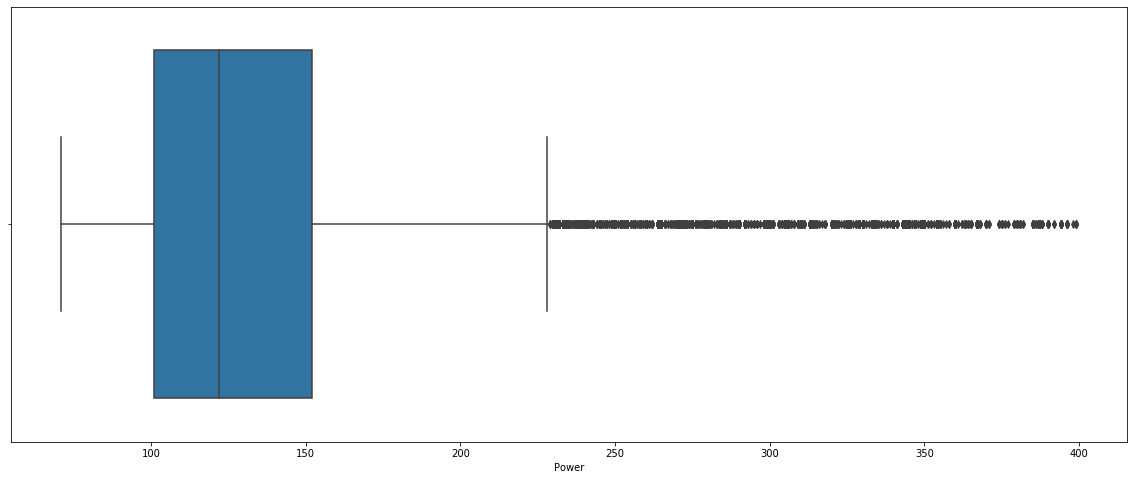

In [25]:
plt.figure(figsize=(20,8))
sns.boxplot("Power", data=df)
plt.show()

In [26]:
df['Price'].describe()

count    251893.000000
mean       5297.324670
std        4759.132933
min           0.000000
25%        1550.000000
50%        3700.000000
75%        7800.000000
max       20000.000000
Name: Price, dtype: float64

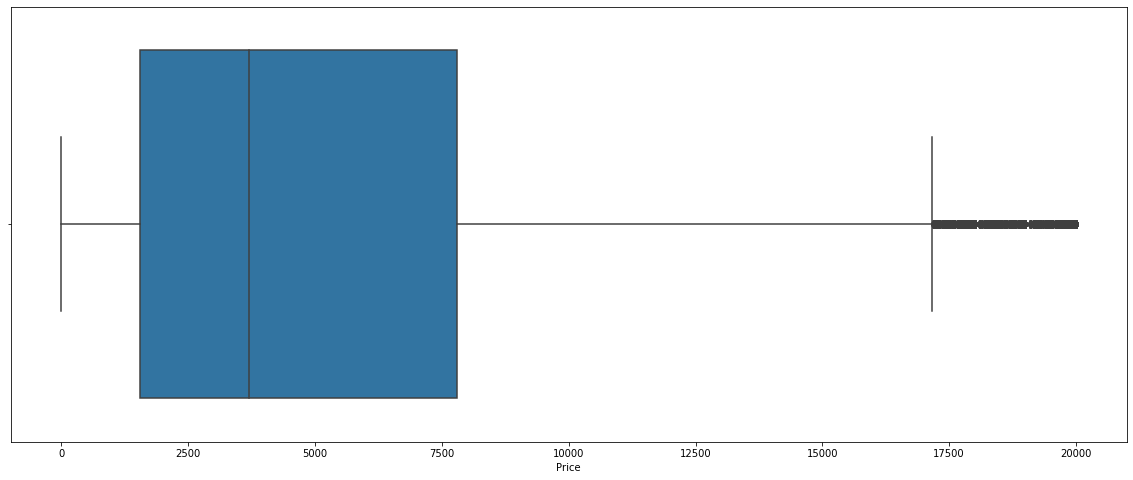

In [27]:
plt.figure(figsize=(20,8))
sns.boxplot("Price", data=df)
plt.show()

Удалим нулевые и слишком большие цены:

In [28]:
df = df.query('Price > 0 and Price < 17500')

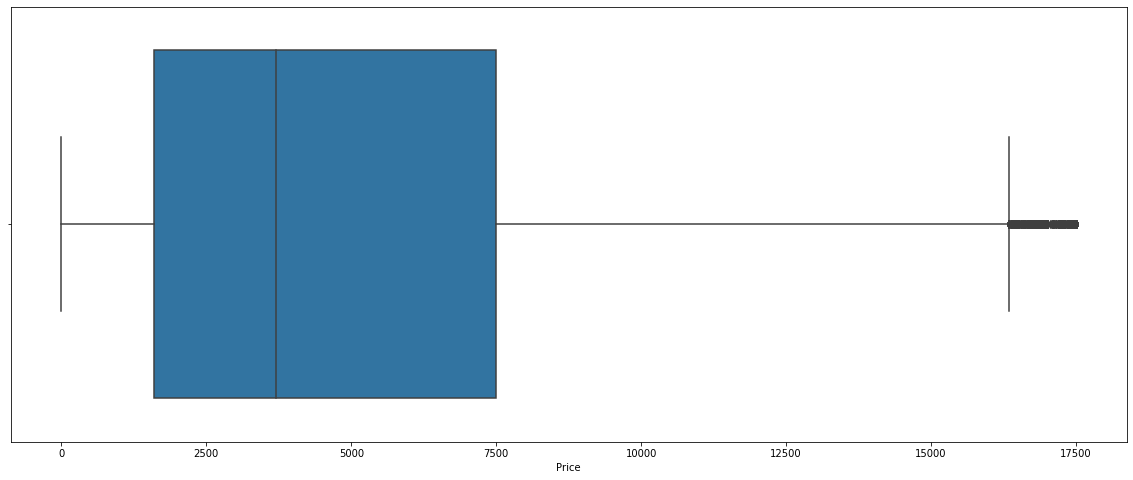

In [29]:
plt.figure(figsize=(20,8))
sns.boxplot("Price", data=df)
plt.show()

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240145 entries, 2 to 354368
Data columns (total 10 columns):
Price               240145 non-null int64
VehicleType         240145 non-null float64
RegistrationYear    240145 non-null int64
Gearbox             240145 non-null float64
Power               240145 non-null int64
Model               240145 non-null float64
Kilometer           240145 non-null int64
FuelType            240145 non-null float64
Brand               240145 non-null float64
NotRepaired         240145 non-null float64
dtypes: float64(6), int64(4)
memory usage: 20.2 MB


Данные готовы к дальнейшей работе

# 2. Обучение моделей

In [32]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, GridSearchCV

Разделим данные для обучения:

In [33]:
target = df['Price']
features = df.drop(['Price'], axis=1)
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.4, random_state=123)

 ### Линейная регрессия

In [34]:
%%time
model_linear = LinearRegression(normalize=True)
model_linear.fit(x_train, y_train)
predict_linear = model_linear.predict(x_test)
print('RMSE:', mean_squared_error(y_test, predict_linear) **0.5)

RMSE: 2840.7944380055305
CPU times: user 65.9 ms, sys: 17.4 ms, total: 83.3 ms
Wall time: 66.4 ms


### Случайный лес

In [35]:
%%time
RF_model = RandomForestRegressor(random_state = 42)
RF_model.fit(x_train, y_train)
RF_model_predict = RF_model.predict(x_test)
print('RMSE:', mean_squared_error(y_test, RF_model_predict)**0.5)

/Users/marinaivanenko/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RMSE: 1621.974509509531
CPU times: user 3.43 s, sys: 79 ms, total: 3.51 s
Wall time: 3.77 s


# 3. Анализ моделей

Исследуем важность признаков:

Text(0.5, 1.0, 'Feature Importance (LinearRegression)')

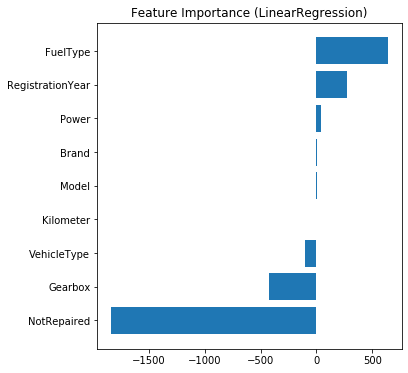

In [36]:
feature_importance = model_linear.coef_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(x_train.columns)[sorted_idx])
plt.title('Feature Importance (LinearRegression)')

Text(0.5, 1.0, 'Feature Importance (RandomForest)')

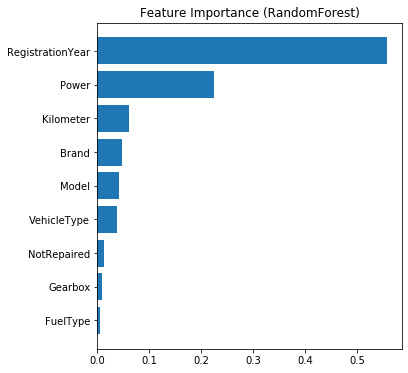

In [37]:
feature_importance = RF_model.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(x_train.columns)[sorted_idx])
plt.title('Feature Importance (RandomForest)')

Видим, что наиболее важные фичи для модели случайного леса это RegistrationYear и Power. NotRepaired, Gearbox, FuelType  - малозначимые признаки

### Вывод



В ходе проектной работы были изучены данные, предоставленные сервиом по продаже автомобилей с пробегом «Не бит, не крашен». Перед построением моделей данные были очищены от пропусков, неважные признаки были удалены. Далее были построены модели:

- Линейная регрессия обучается быстро, но при этом дает наибольшее значение RMSE среди всех моделей.

- Модель случайного леса RandomForest при показанном минимальном времени имеет достаточно высокое значение RMSE
